In [2]:
import numpy as np
import xarray as xr
import xgcm
import xmitgcm as xm
import MITgcmutils as mutil
from matplotlib import gridspec as gridspec
from matplotlib import pyplot as plt
import cftime
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.append('/nethome/4302001/diffusion-hydro-mod/tools/')
import ACC_tools

# Dataset preparation

In [3]:
ds_stats = ACC_tools.mitgcm_stat_xr("/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_spinup/dynStDiag.0000000000.txt", "/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_spinup/RC")

In [6]:
ds = xm.open_mdsdataset(data_dir="/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_spinup/Diags", prefix=["2D_diags", "GM_diags", "state"], calendar="360_days")

/nethome/4302001/miniconda3/lib/python3.8/site-packages/xmitgcm/mds_store.py:886: UserWarning: Couldn't find available_diagnostics.log in /data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_spinup/Diags or /data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_spinup/Diags. Using default version.
  warnings.warn("Couldn't find available_diagnostics.log "


In [9]:
ds_inst = xm.open_mdsdataset(data_dir="/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_spinup/Diags", prefix=["heat_3D", "layDiag"], calendar="360_days")

In [11]:
grid = xgcm.Grid(ds, periodic=['X'], boundary='extend', metrics={
        ('X',): ['dxC', 'dxG'], # X distances
        ('Y',): ['dyC', 'dyG'], # Y distances
        ('Z',): ['drC', 'drF'], # Z distances
        ('X', 'Y'): ['rA', 'rAz', 'rAs', 'rAw'] # Areas
    })

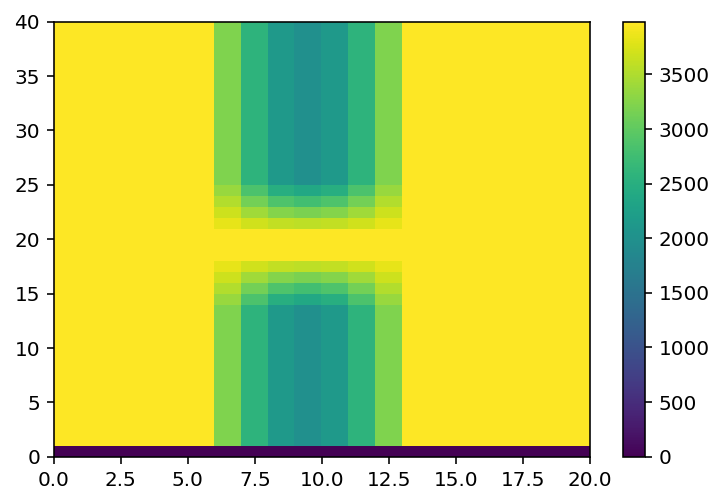

In [12]:
depth = mutil.rdmds("/scratch/daanr/ACC_run_coarse/Depth")
plt.pcolormesh(depth)
plt.colorbar()

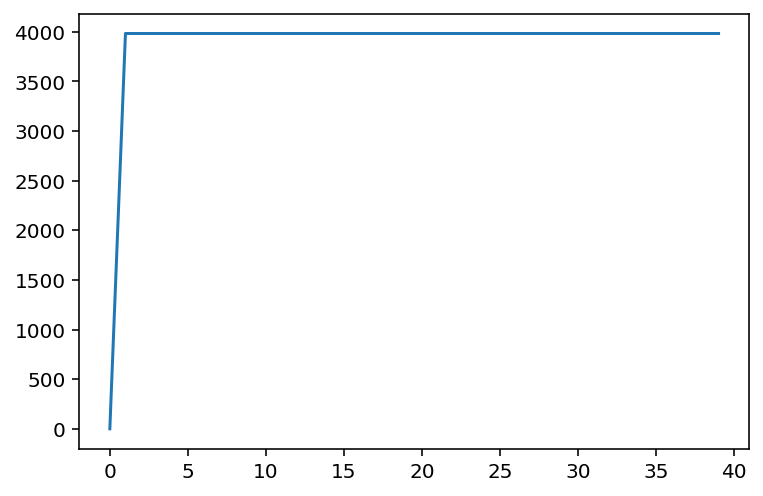

In [13]:
plt.plot(depth[:, 0])

# Analysis
## Surface 
### Surface temperature

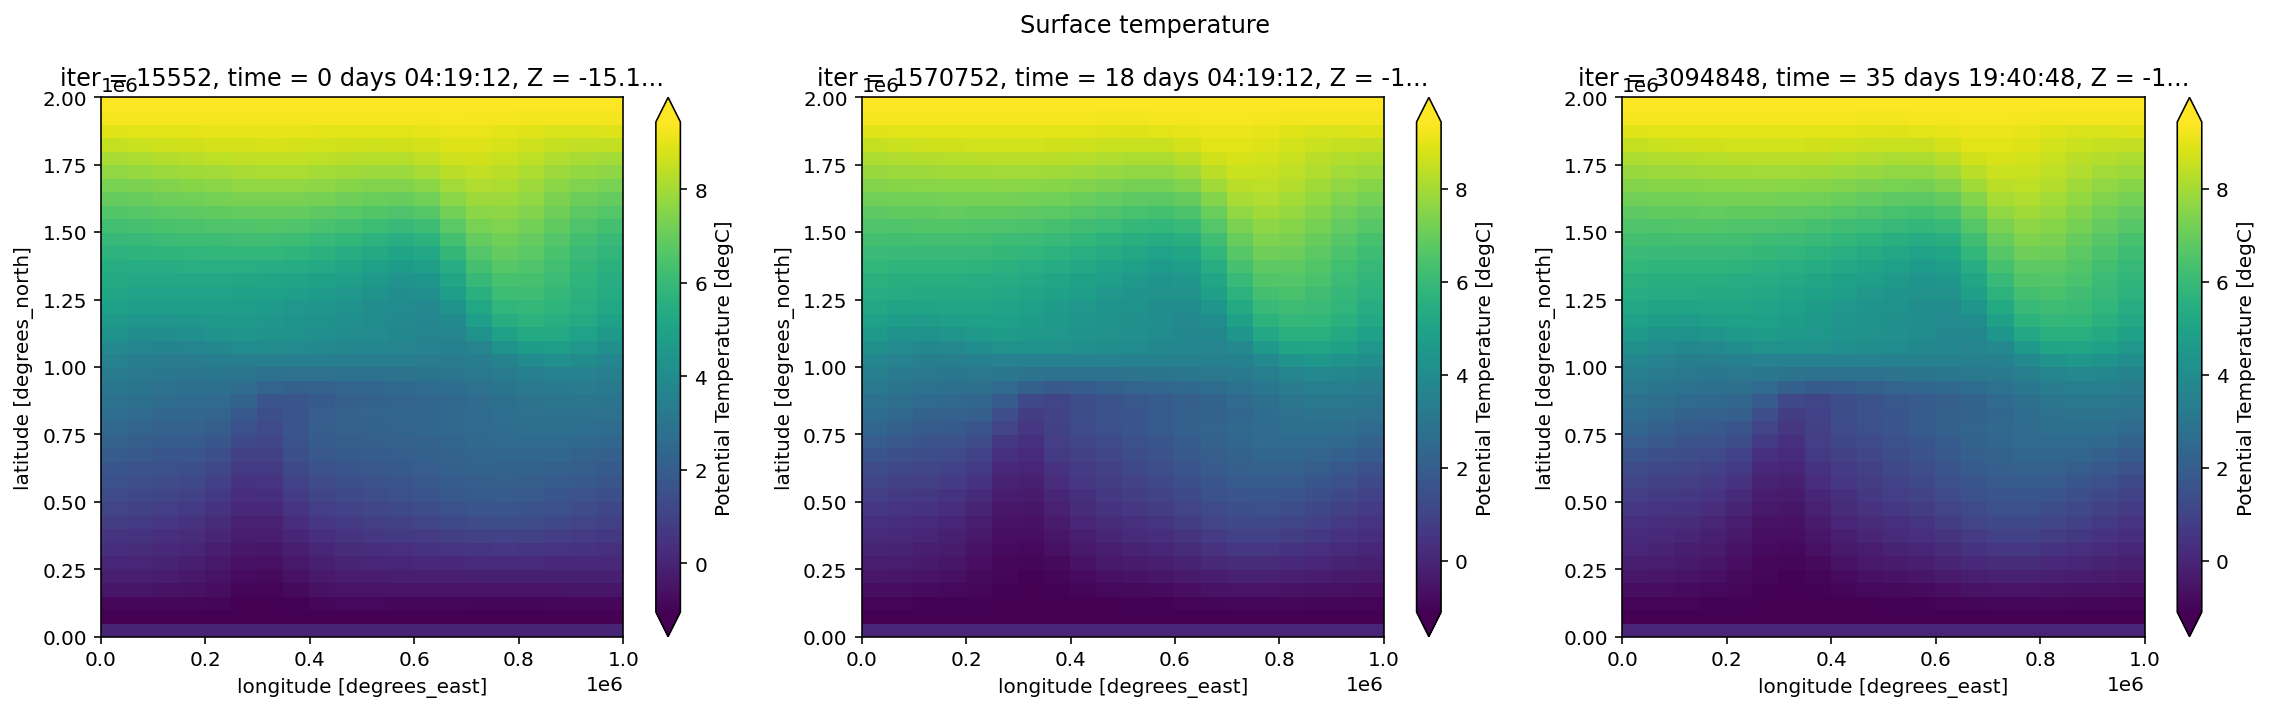

In [5]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Surface temperature")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.THETA.isel(time=0, Z=2).plot(ax=f1_ax1, robust=True, center=False)
ds.THETA.isel(time=50, Z=2).plot(ax=f1_ax2, robust=True, center=False)
ds.THETA.isel(time=-1, Z=2).plot(ax=f1_ax3, robust=True, center=False)
plt.show()

In [118]:
print("Minimum surface temperature:", ds.THETA.isel(time=-1, Z=0).min().compute().data)
print("Maximum surface temperature:", ds.THETA.isel(time=-1, Z=0).max().compute().data)

Minimum surface temperature: -1.2118449
Maximum surface temperature: 9.779094


### Velocities

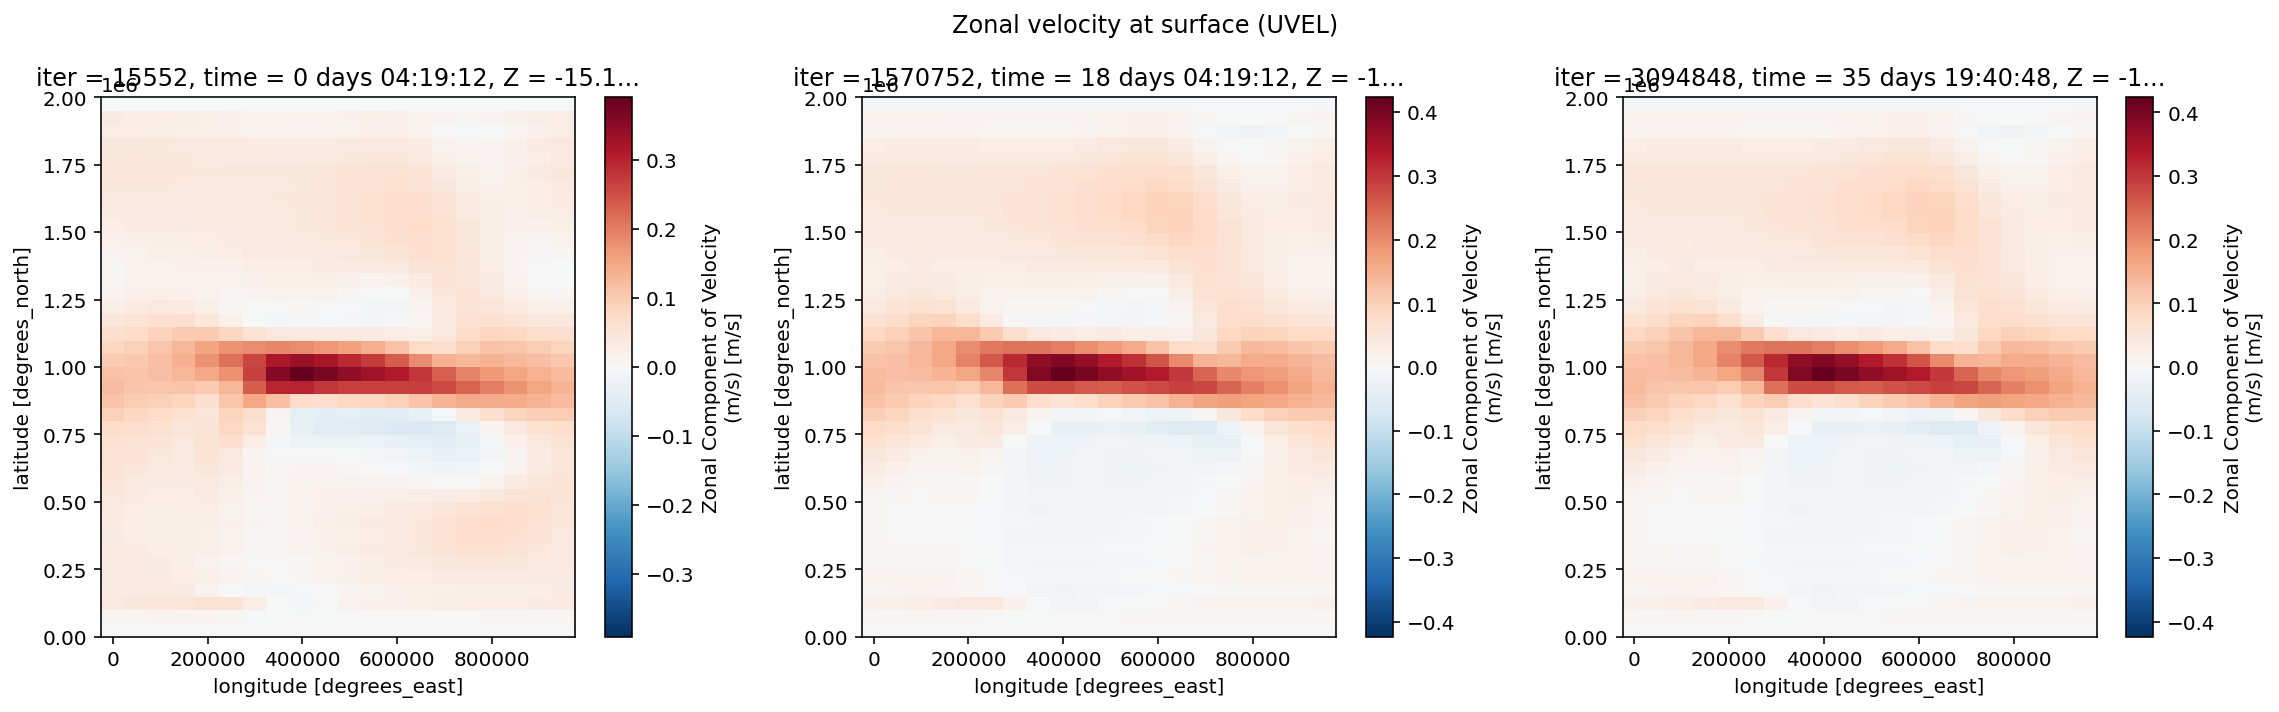

In [6]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal velocity at surface (UVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.UVEL.isel(time=0, Z=2).plot(ax=f1_ax1)
ds.UVEL.isel(time=50, Z=2).plot(ax=f1_ax2)
ds.UVEL.isel(time=-1, Z=2).plot(ax=f1_ax3)
plt.show()

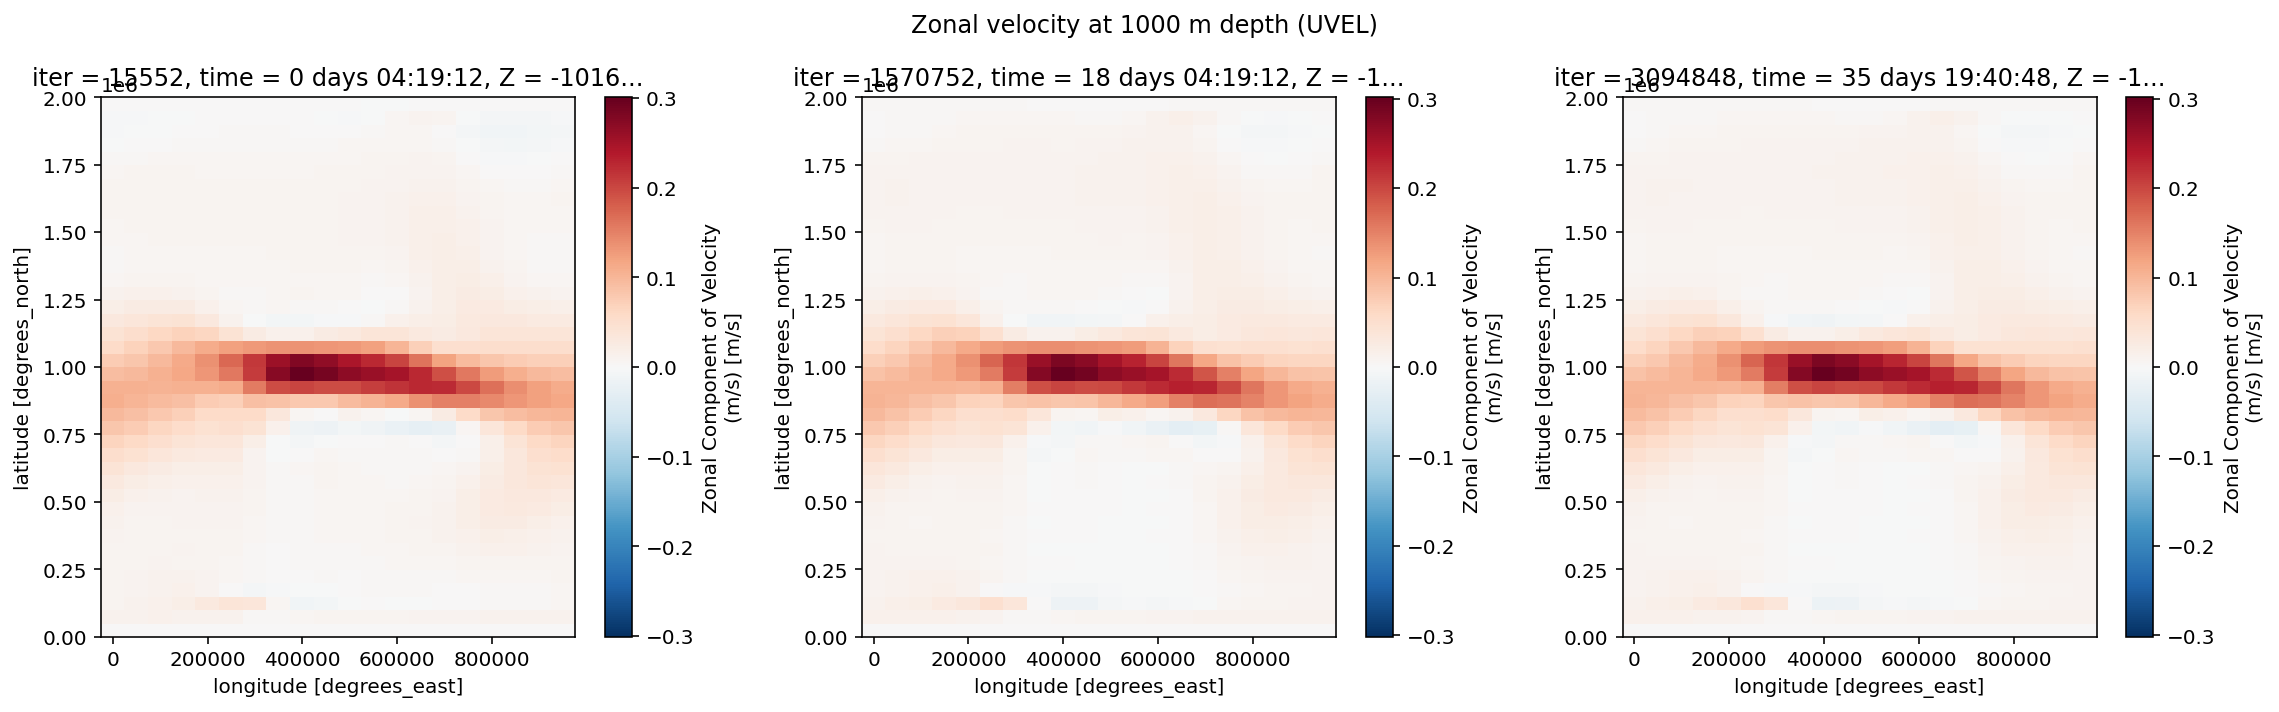

In [9]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal velocity at 1000 m depth (UVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.UVEL.isel(time=0).sel(Z=-1000, method="nearest").plot(ax=f1_ax1)
ds.UVEL.isel(time=50).sel(Z=-1000, method="nearest").plot(ax=f1_ax2)
ds.UVEL.isel(time=-1).sel(Z=-1000, method="nearest").plot(ax=f1_ax3)
plt.show()

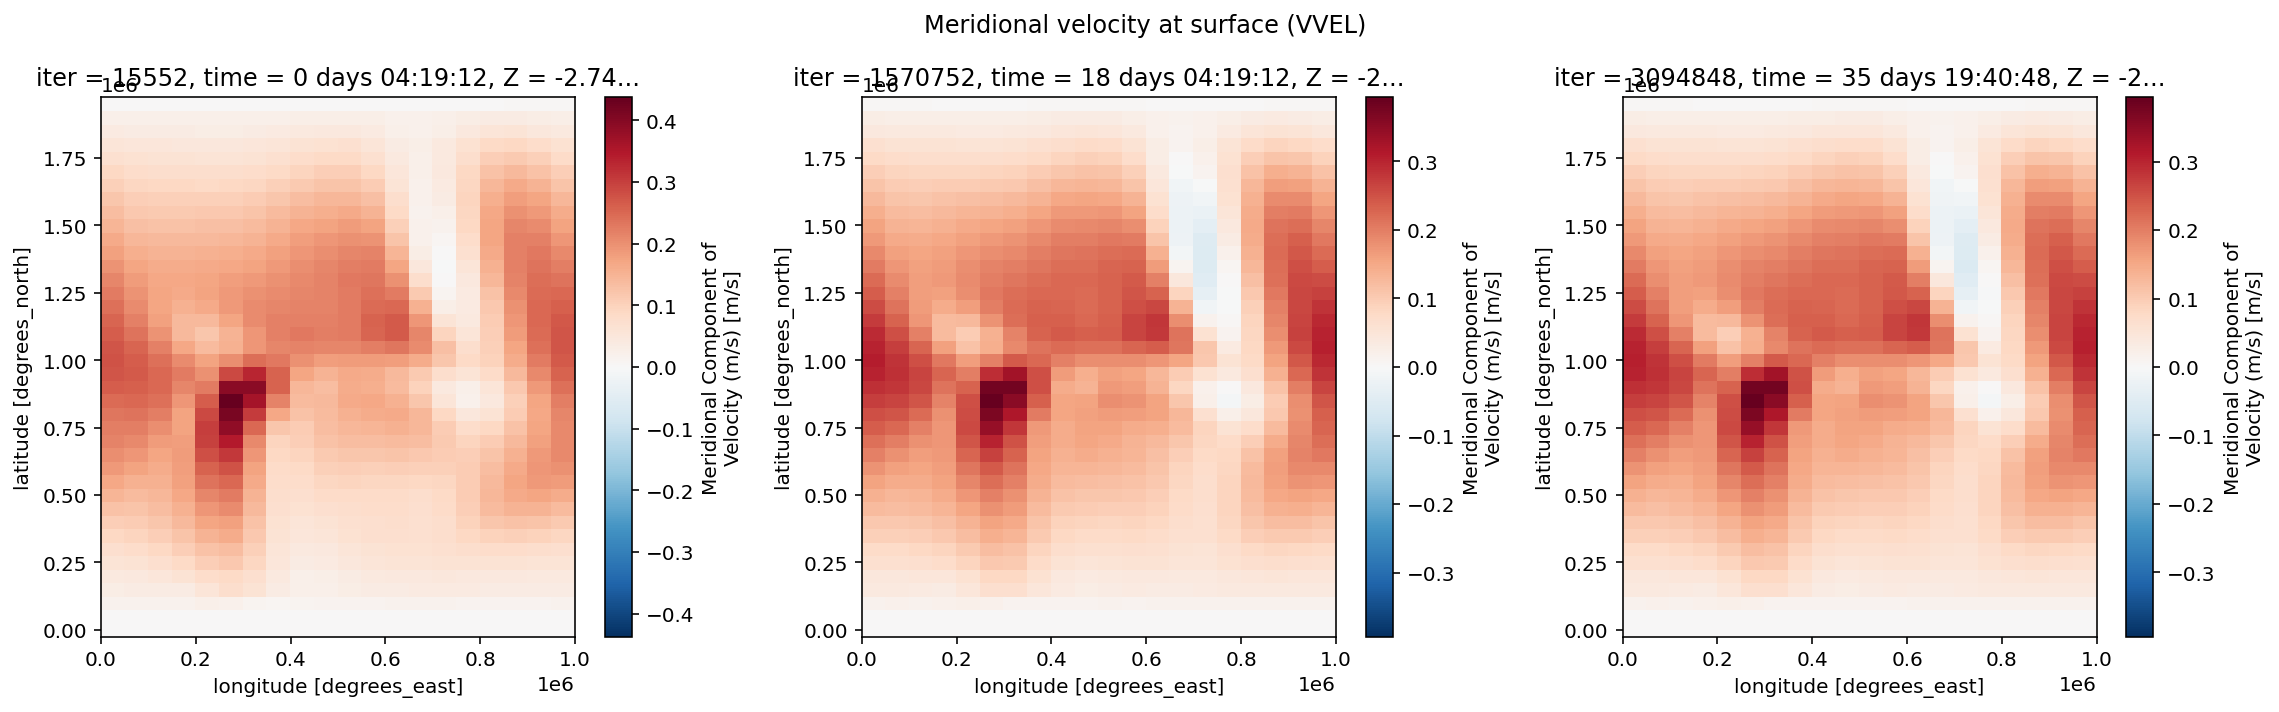

In [10]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Meridional velocity at surface (VVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.VVEL.isel(time=0, Z=0).plot(ax=f1_ax1,)
ds.VVEL.isel(time=50, Z=0).plot(ax=f1_ax2,)
ds.VVEL.isel(time=-1, Z=0).plot(ax=f1_ax3,)
plt.show()

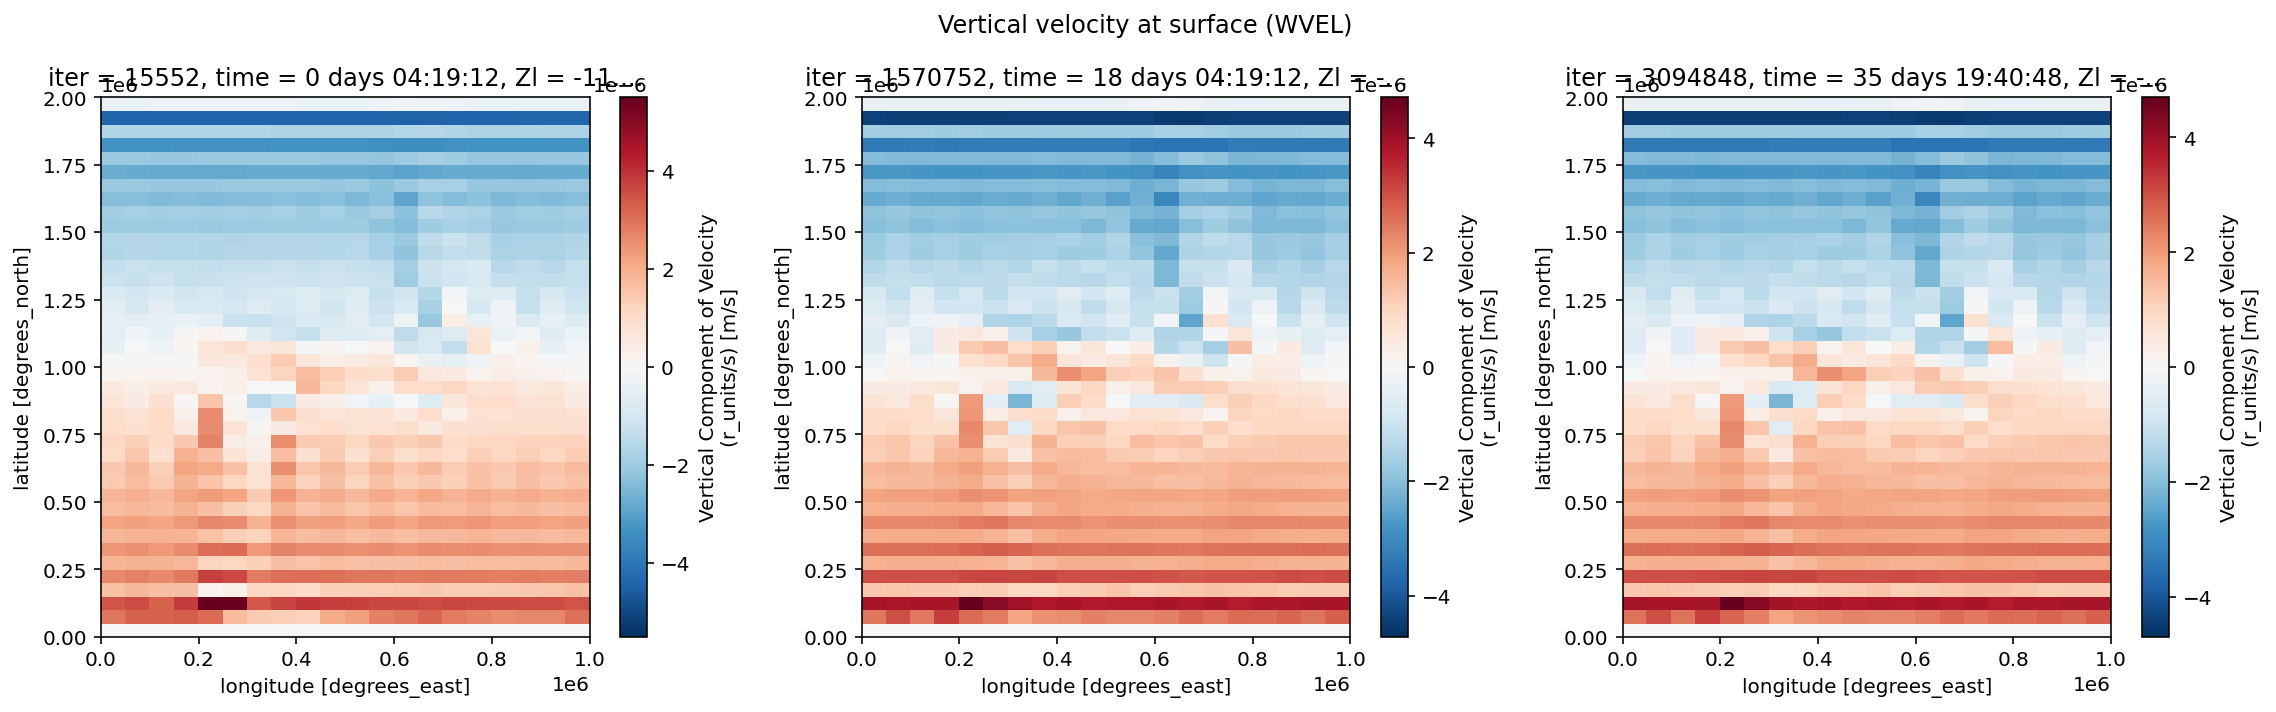

In [12]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Vertical velocity at surface (WVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.WVEL.isel(time=0, Zl=2).plot(ax=f1_ax1,)
ds.WVEL.isel(time=50, Zl=2).plot(ax=f1_ax2,)
ds.WVEL.isel(time=-1, Zl=2).plot(ax=f1_ax3,)
plt.show()

### Mixed-layer depth

This mixed-layer depth is computed using MITgcm's criterion: the depth at which the potential temperature differs from that at the surface layer by 0.8 degrees. The actual mixed-layer lies less deep, and this criterion works especially poorly near the Southern Boundary.

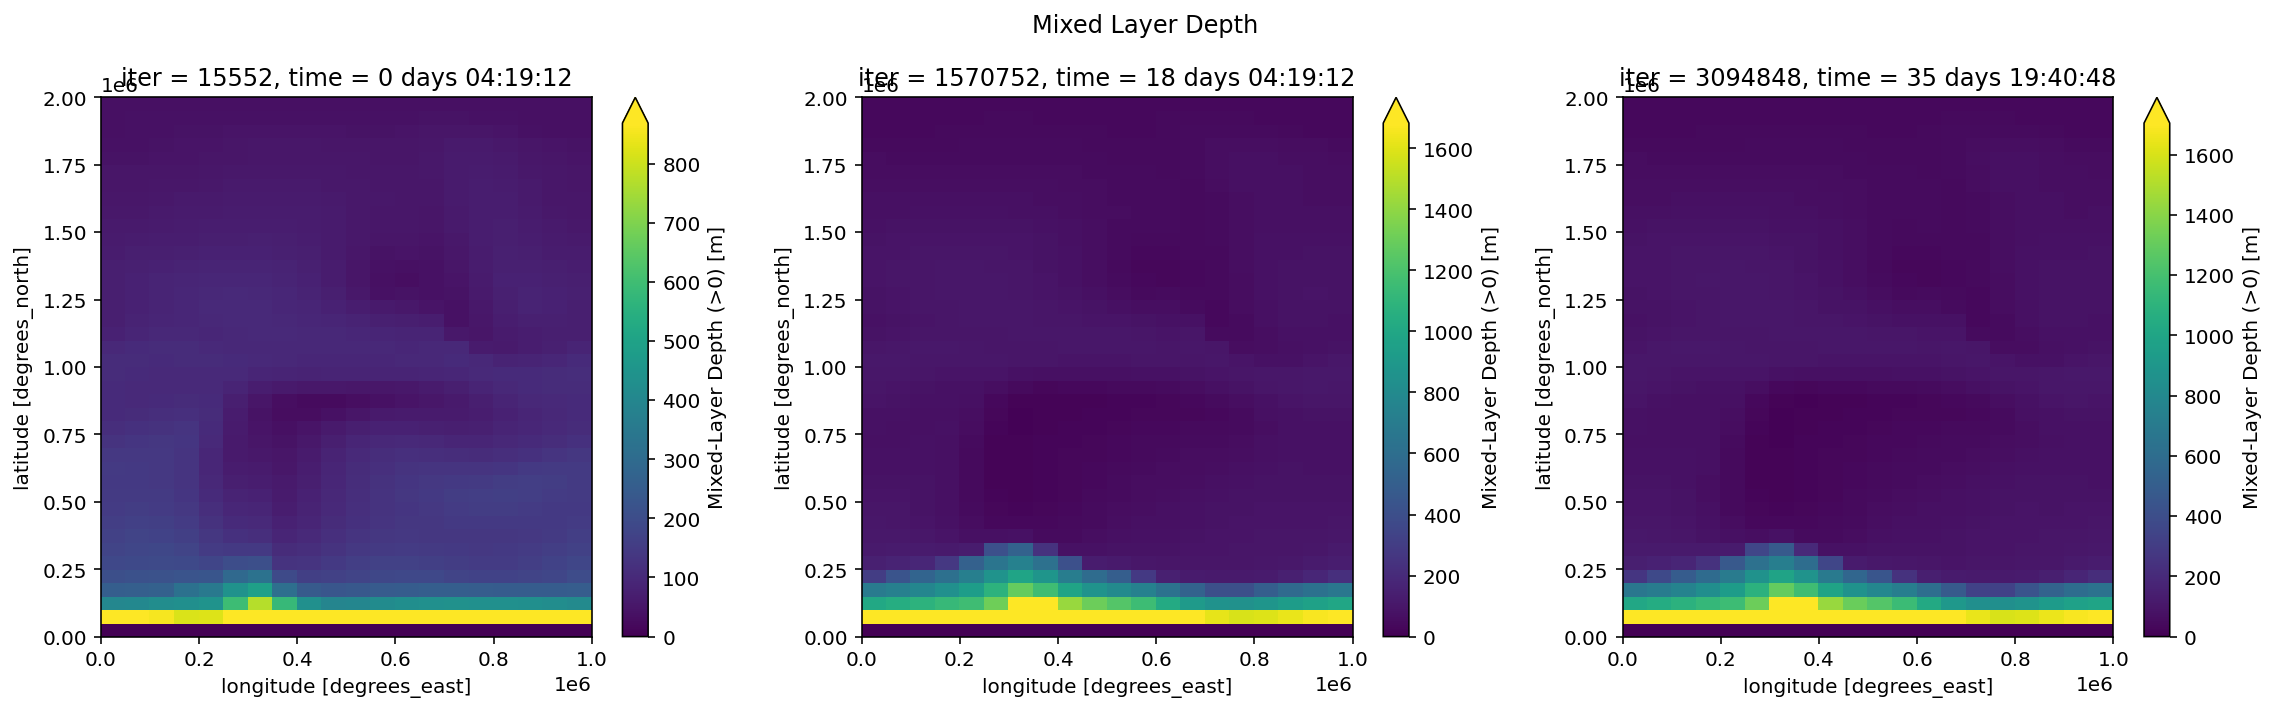

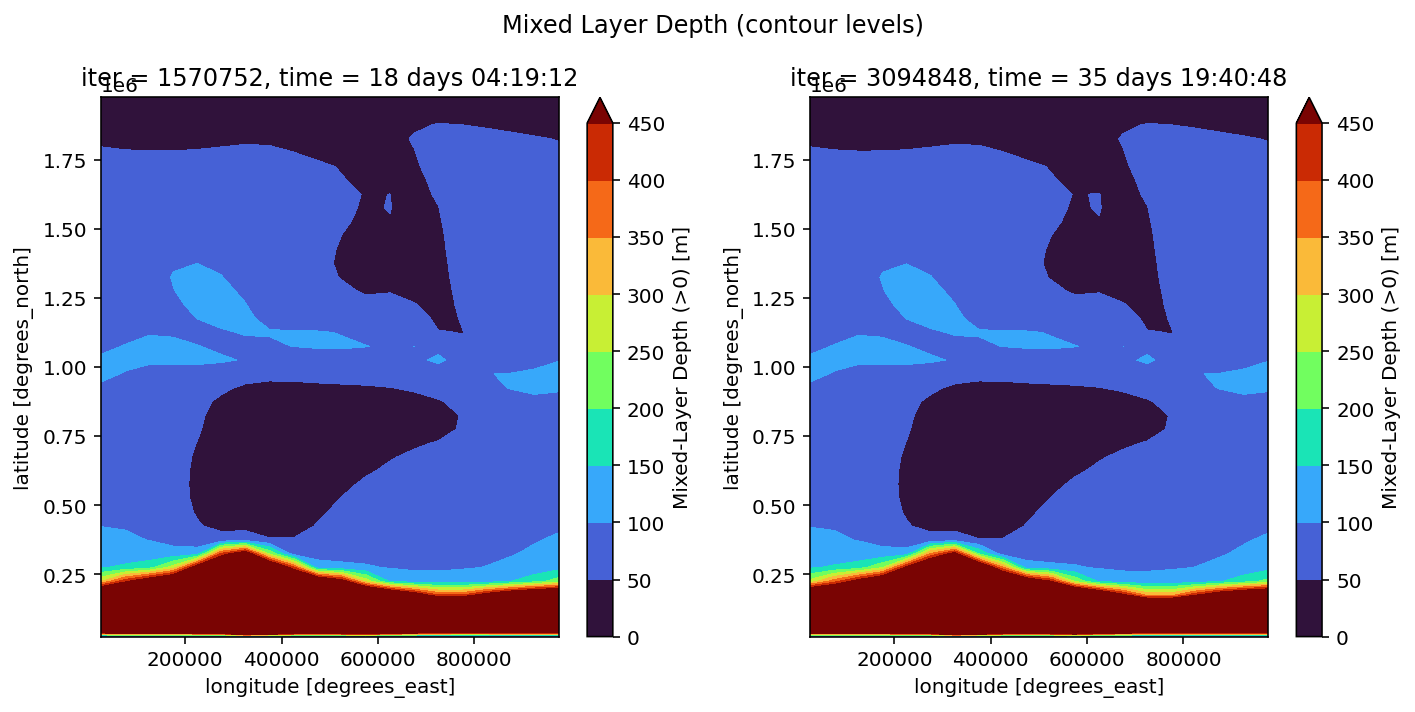

In [17]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Mixed Layer Depth")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.MXLDEPTH.isel(time=0).plot(ax=f1_ax1, robust=True)
ds.MXLDEPTH.isel(time=50).plot(ax=f1_ax2, robust=True)
ds.MXLDEPTH.isel(time=-1).plot(ax=f1_ax3, robust=True)

fig2 = plt.figure(tight_layout=True, figsize=(10, 5))
fig2.suptitle("Mixed Layer Depth (contour levels)")
spec2 = gridspec.GridSpec(ncols=2, nrows=1, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])

ds.MXLDEPTH.isel(time=50).plot.contourf(ax=f2_ax1, levels=np.arange(0, 500, 50), cmap="turbo")
ds.MXLDEPTH.isel(time=-1).plot.contourf(ax=f2_ax2, levels=np.arange(0, 500, 50), cmap="turbo")
plt.show()

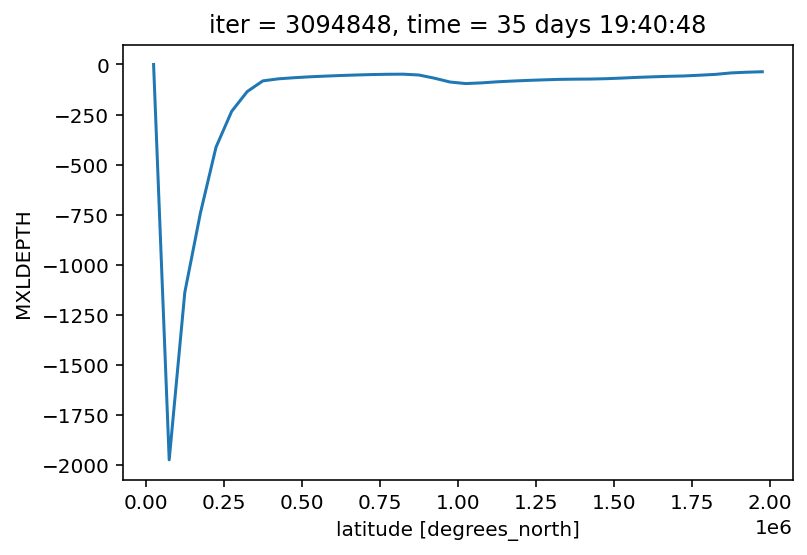

In [20]:
(-ds.MXLDEPTH).isel(time=-1).mean('XC').plot()
plt.show()

### Surface Elevation

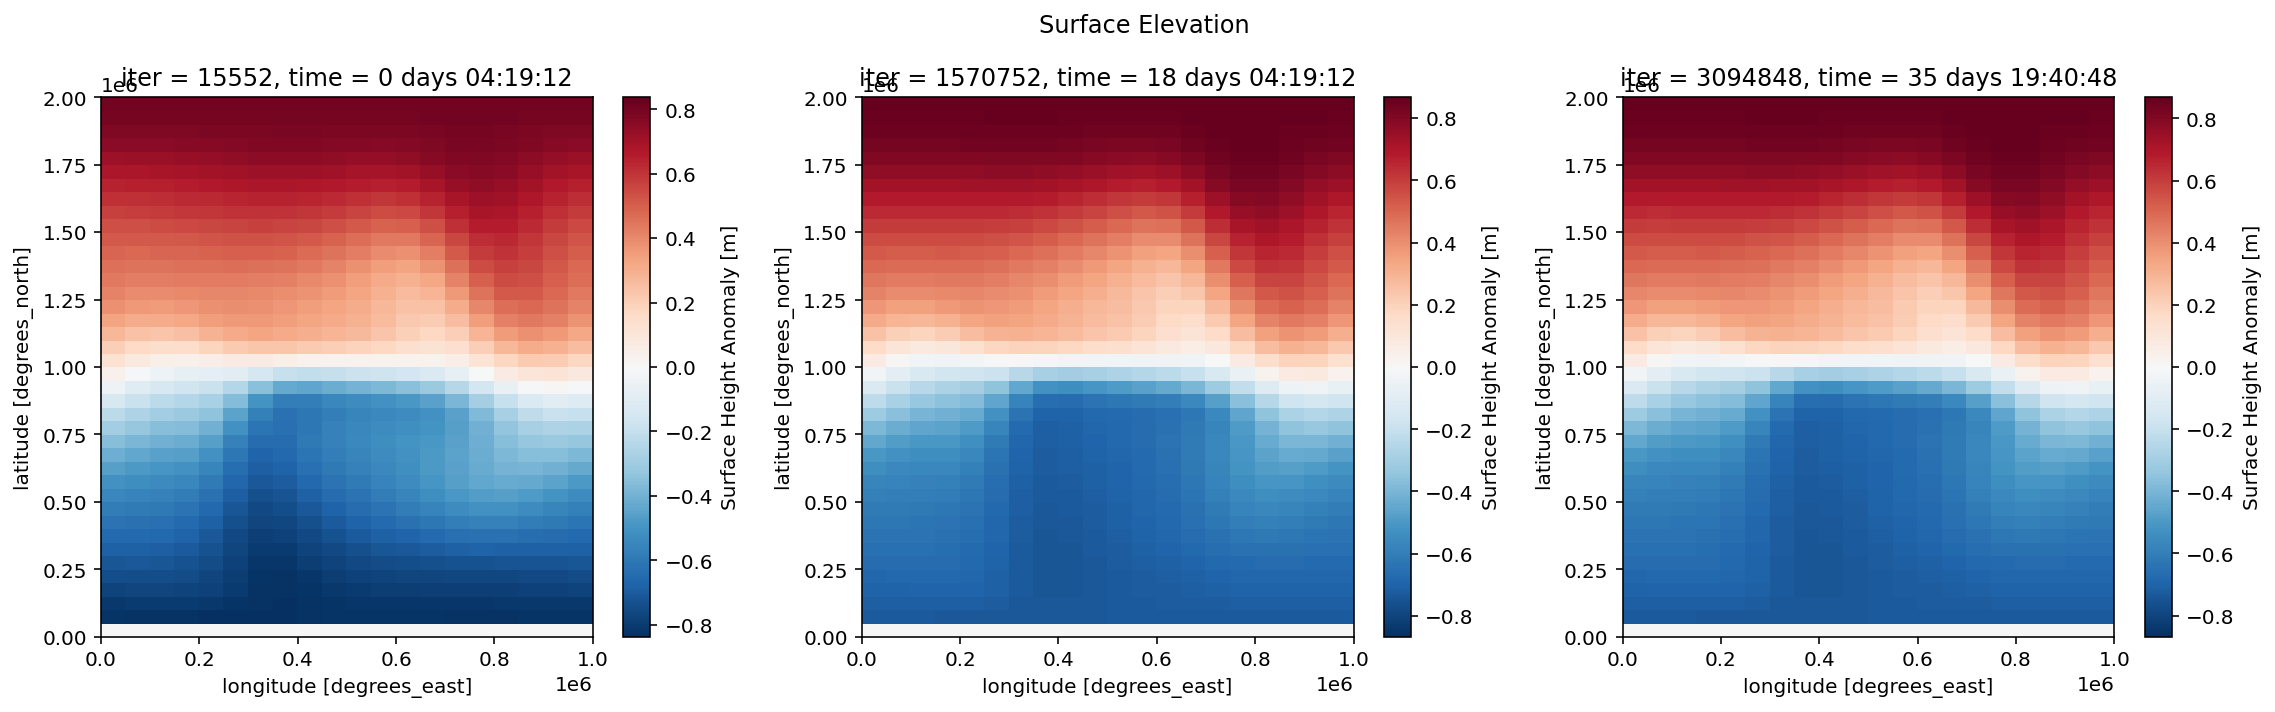

In [21]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Surface Elevation")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.ETAN.isel(time=0).plot(ax=f1_ax1)
ds.ETAN.isel(time=50).plot(ax=f1_ax2)
ds.ETAN.isel(time=-1).plot(ax=f1_ax3)
plt.show()

### Kinetic Energy

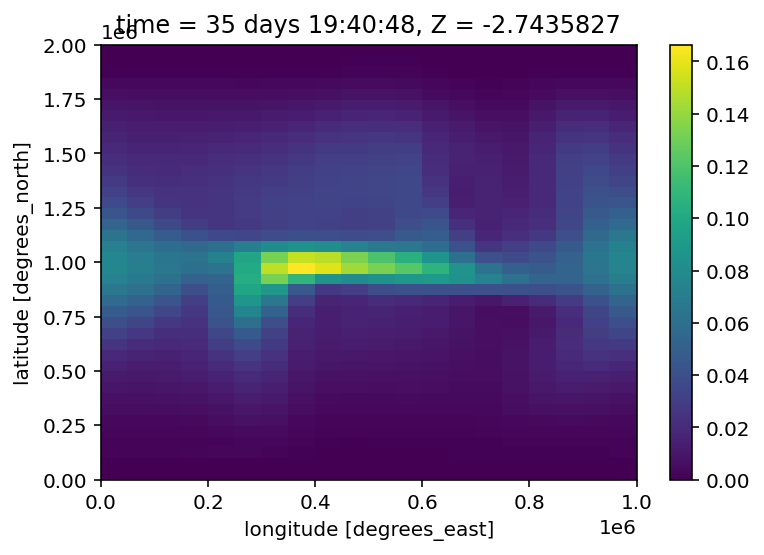

In [35]:
ke = 0.5 * (
    grid.interp((ds.UVEL) ** 2, "X")
    + grid.interp((ds.VVEL) ** 2, "Y")
)
ke.isel(time=-1, Z=0).plot()

## 3D variables
### Potential Temperature 

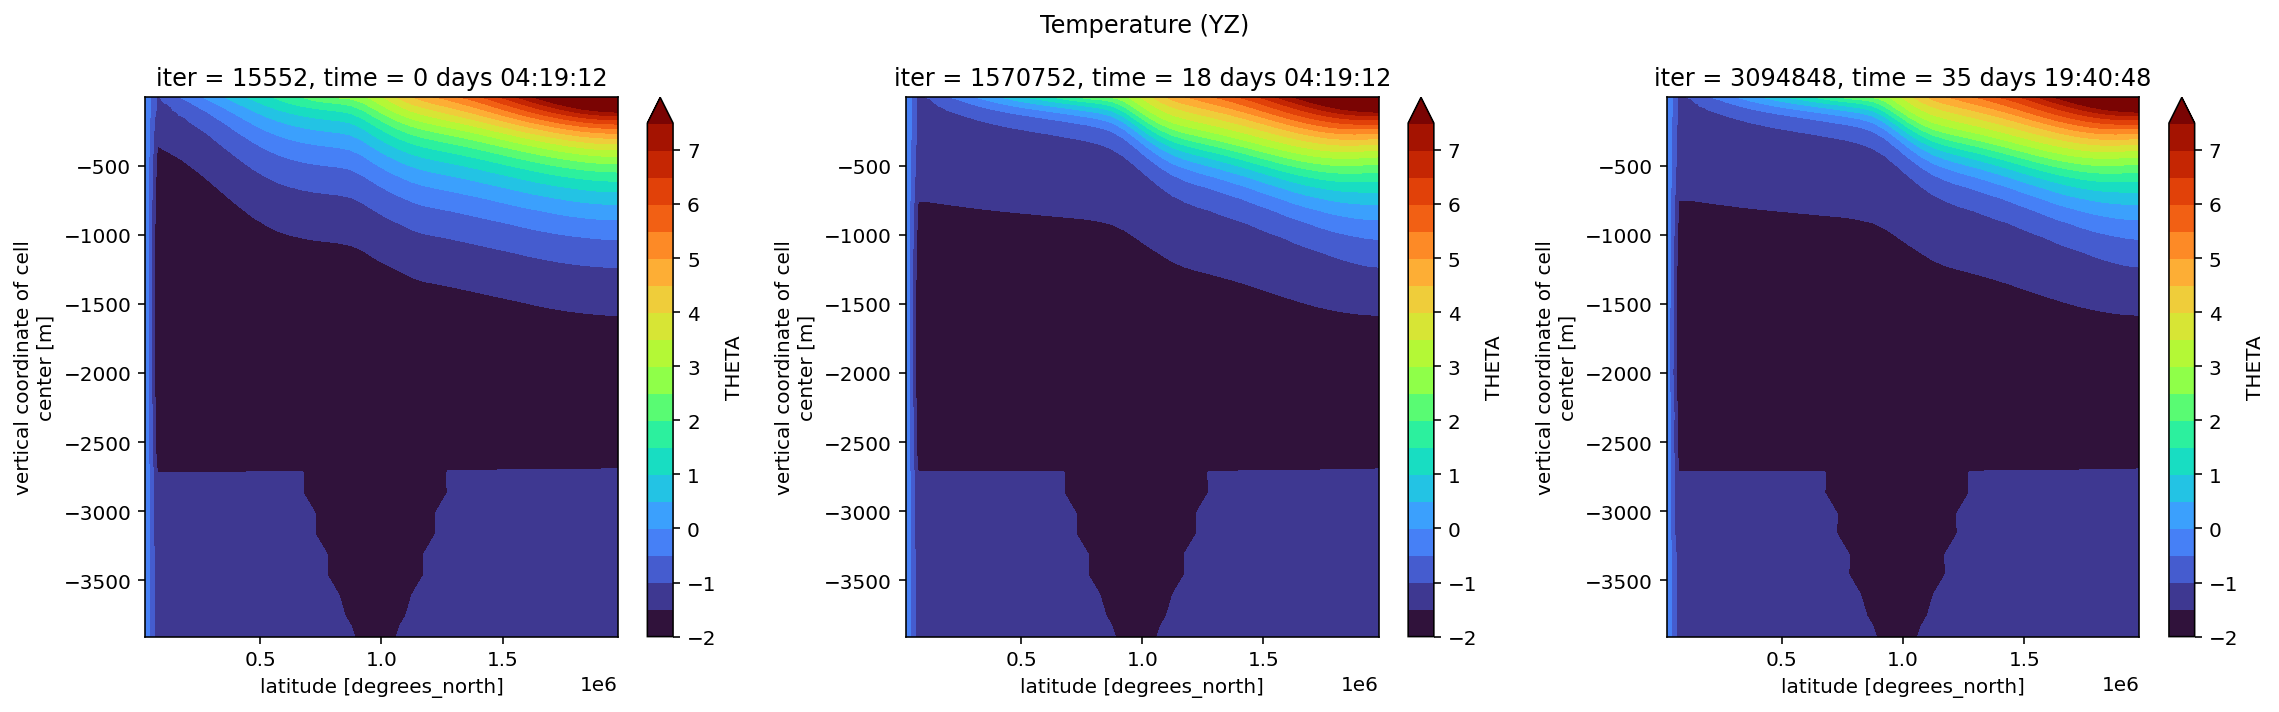

In [37]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Temperature (YZ)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.THETA.isel(time=0).mean("XC").plot.contourf(ax=f1_ax1, levels=np.arange(-2, 8, 0.5), cmap="turbo")
ds.THETA.isel(time=50).mean("XC").plot.contourf(ax=f1_ax2, levels=np.arange(-2, 8, 0.5), cmap="turbo")
ds.THETA.isel(time=-1).mean("XC").plot.contourf(ax=f1_ax3, levels=np.arange(-2, 8, 0.5), cmap="turbo")
plt.show()

Temperature profiles assume expected shape (see Abernathey)

### Velocities

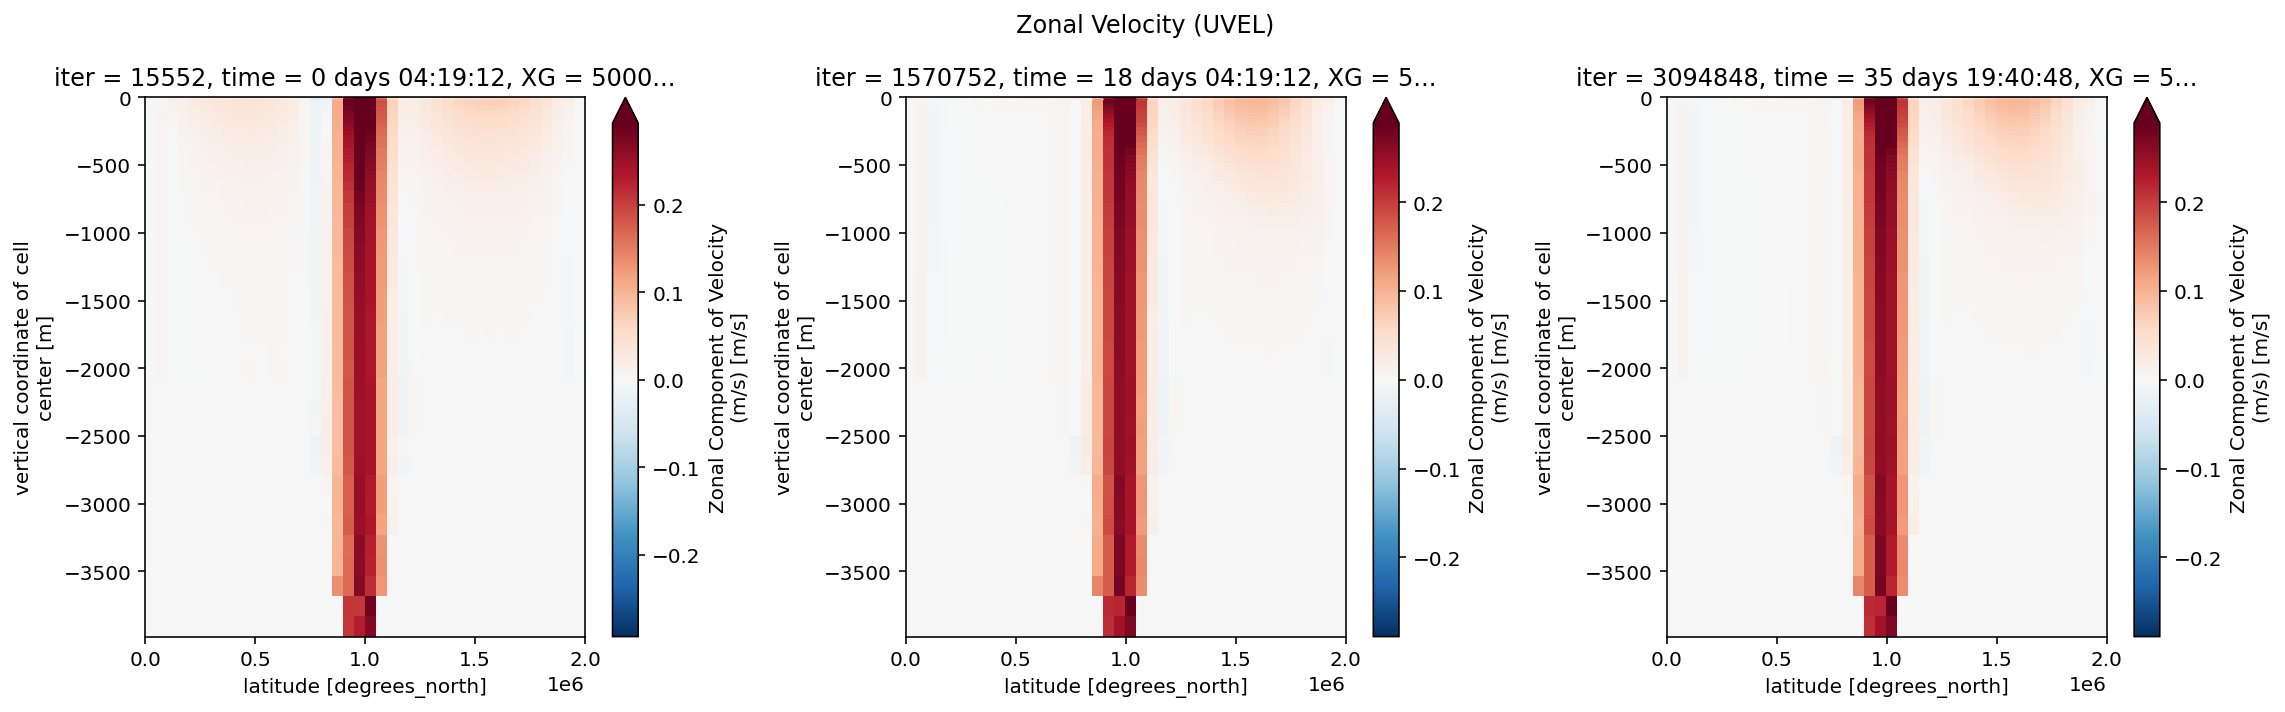

In [44]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal Velocity (UVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.UVEL.isel(time=0, XG=10).plot(ax=f1_ax1, robust=True)
ds.UVEL.isel(time=50, XG=10).plot(ax=f1_ax2, robust=True)
ds.UVEL.isel(time=-1, XG=10).plot(ax=f1_ax3, robust=True)
plt.show()

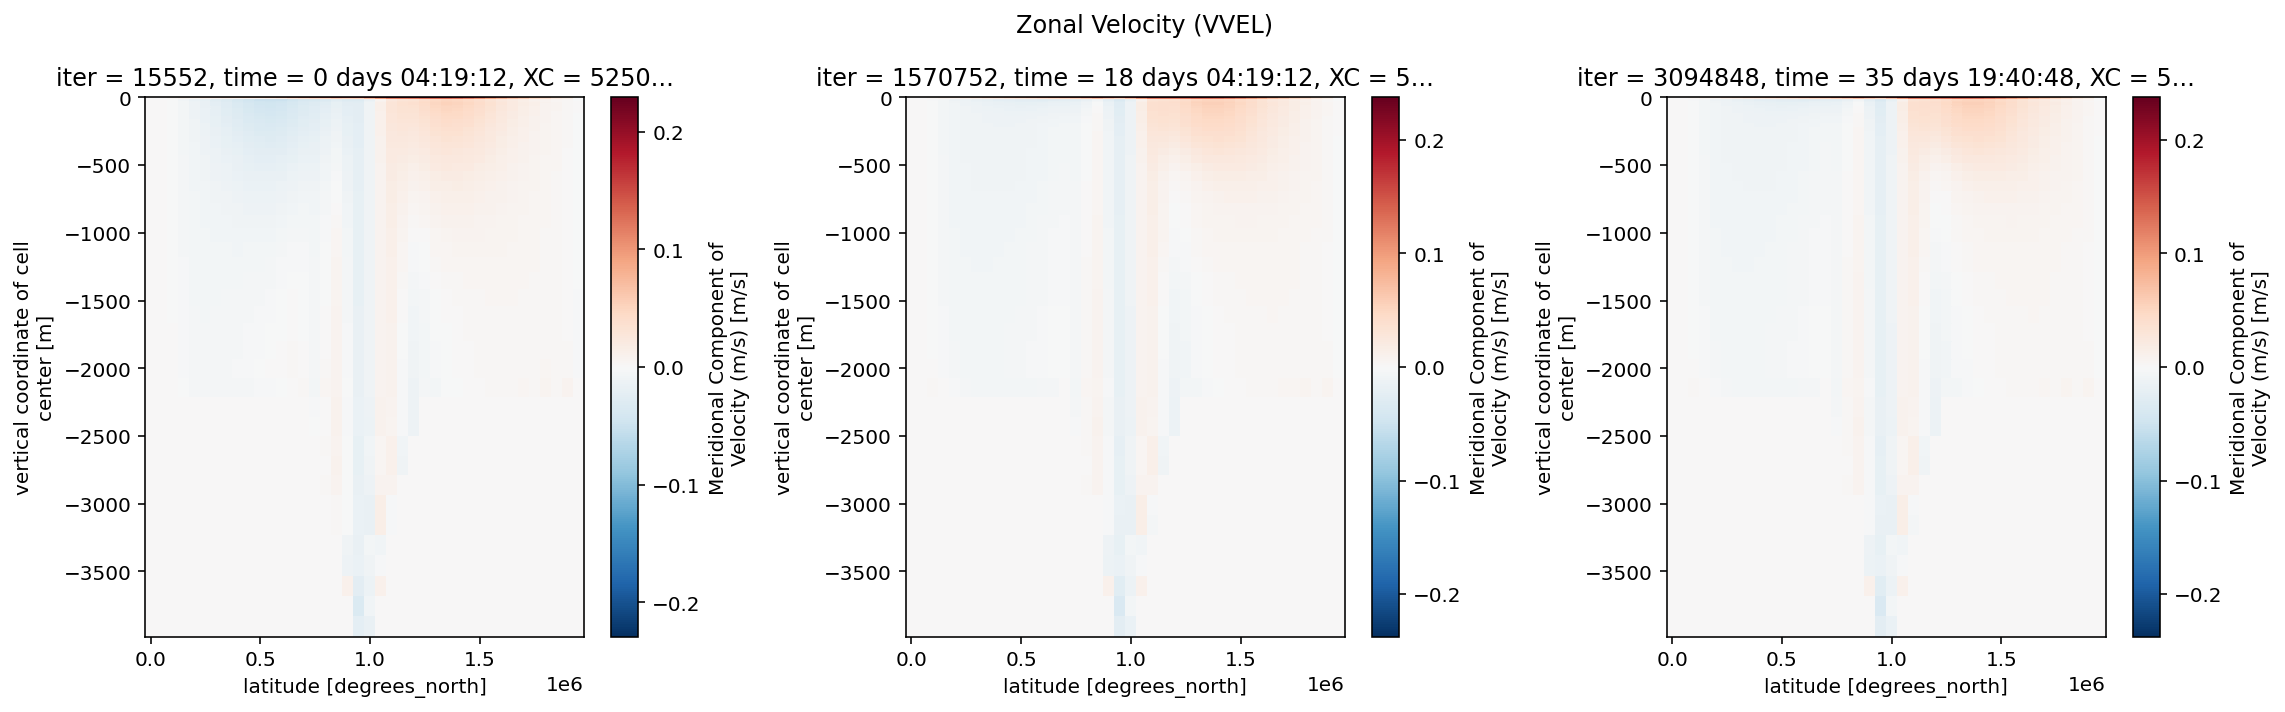

In [40]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Zonal Velocity (VVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.VVEL.isel(time=0, XC=10).plot(ax=f1_ax1)
ds.VVEL.isel(time=50, XC=10).plot(ax=f1_ax2)
ds.VVEL.isel(time=-1, XC=10).plot(ax=f1_ax3)
plt.show()

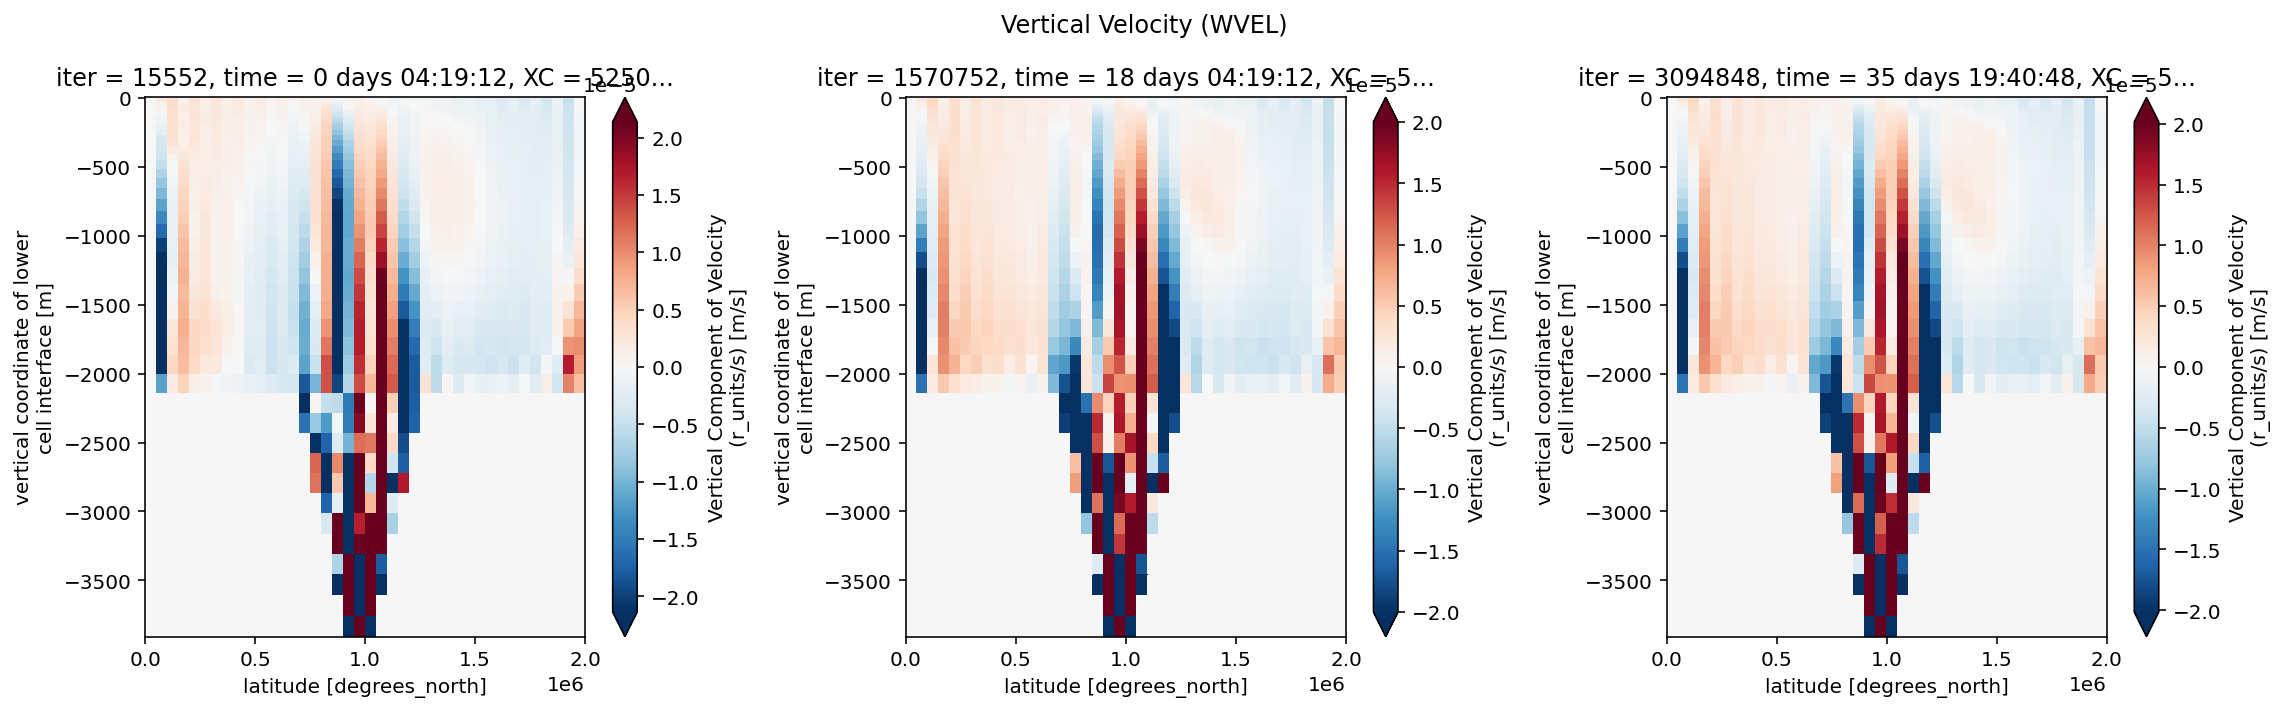

In [43]:
fig1 = plt.figure(tight_layout=True, figsize=(16, 5))
fig1.suptitle("Vertical Velocity (WVEL)")
spec1 = gridspec.GridSpec(ncols=3, nrows=1, figure=fig1)
f1_ax1 = fig1.add_subplot(spec1[0, 0])
f1_ax2 = fig1.add_subplot(spec1[0, 1])
f1_ax3 = fig1.add_subplot(spec1[0, 2])

ds.WVEL.isel(time=0, XC=10).plot(ax=f1_ax1, robust=True)
ds.WVEL.isel(time=50, XC=10).plot(ax=f1_ax2, robust=True)
ds.WVEL.isel(time=-1, XC=10).plot(ax=f1_ax3, robust=True)
plt.show()

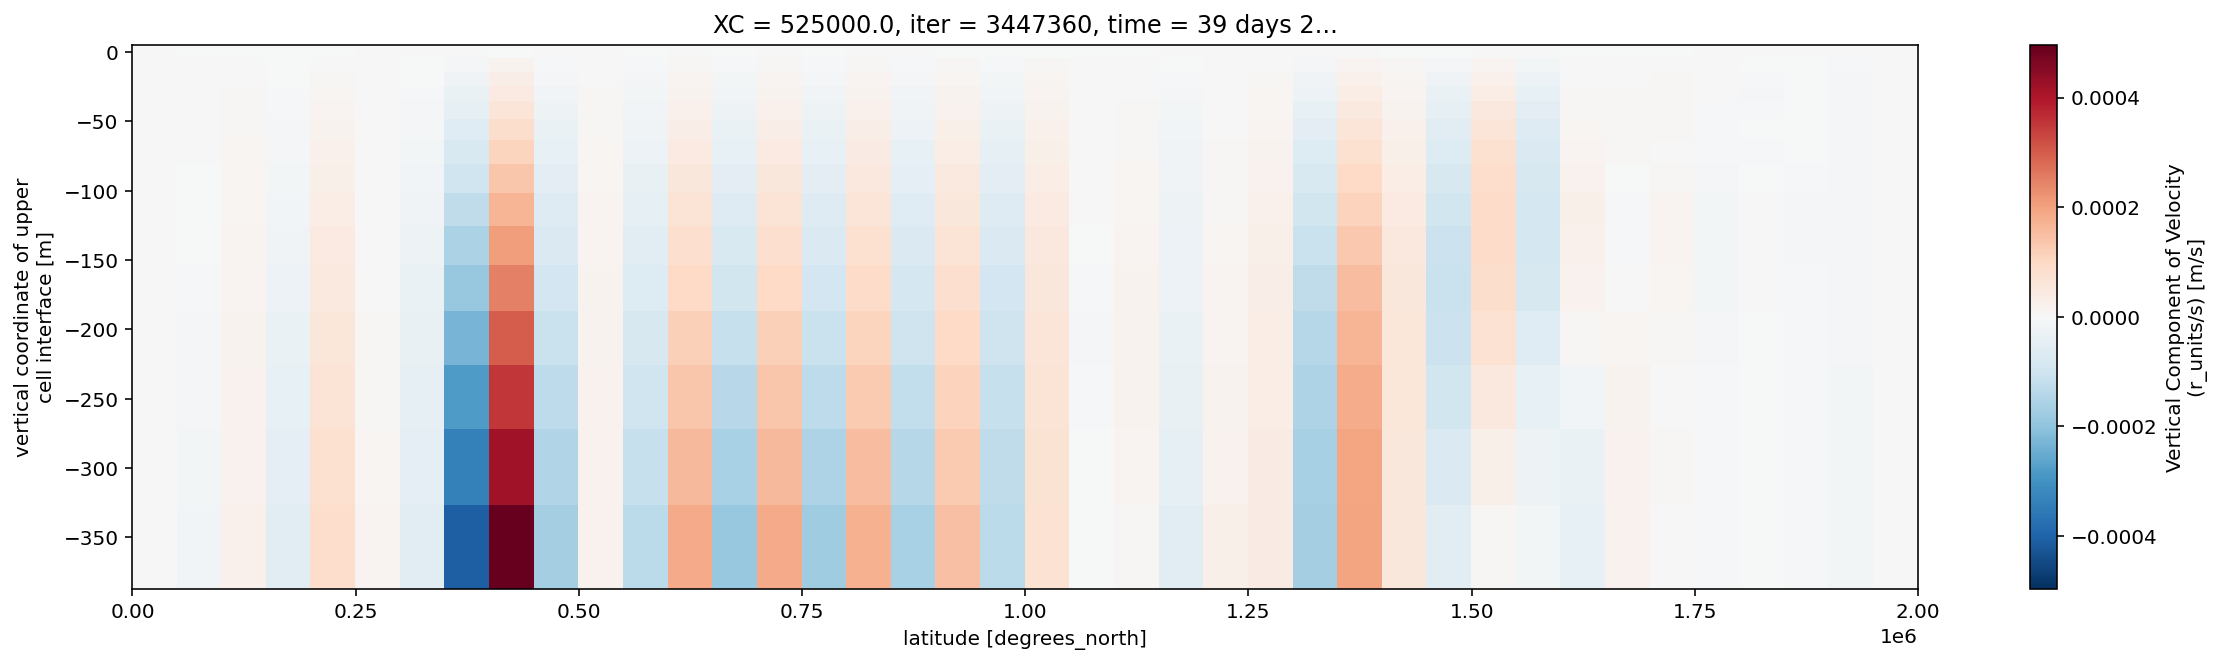

In [20]:
fig, ax = plt.subplots(figsize=(20, 5))
ds.WVEL.isel(time=-1, XC=10, Zl=slice(0, 15)).plot(ax=ax)

In [52]:
for veloType in ["UVEL", "VVEL", "WVEL"]:
    print(f"Minimum {veloType}:", ds[veloType].isel(time=-1).min().compute().data)
    print(f"Maximum {veloType}:", ds[veloType].isel(time=-1).max().compute().data)
    if veloType != "WVEL":
        print(
            f"Mean {veloType} (at top 15 layers):",
            ds[veloType].isel(time=-1, Z=slice(0, 15)).mean().compute().data,
        )
        print(
            f"Std({veloType}) (at top 15 layers):",
            np.std(ds[veloType].isel(time=-1, Z=slice(0, 15))).mean().compute().data,
        )
    else:
        print(
            f"Mean {veloType} (at top 15 layers):",
            ds[veloType].isel(time=-1, Zl=slice(0, 15)).mean().compute().data,
        )
        print(
            f"Std({veloType}) (at top 15 layers):",
            np.std(ds[veloType].isel(time=-1, Zl=slice(0, 15))).mean().compute().data,
        )
    print("----------")

Minimum UVEL: -0.058283042
Maximum UVEL: 0.5413426
Mean UVEL (at top 15 layers): 0.058982432
Std(UVEL) (at top 15 layers): 0.074012764
----------
Minimum VVEL: -0.22568235
Maximum VVEL: 0.39379784
Mean VVEL (at top 15 layers): 0.011449228
Std(VVEL) (at top 15 layers): 0.064211324
----------
Minimum WVEL: -0.0006520997
Maximum WVEL: 0.0006005921
Mean WVEL (at top 15 layers): 9.701277e-15
Std(WVEL) (at top 15 layers): 2.4052854e-06
----------


# Average variable development over time

## Normalized heat

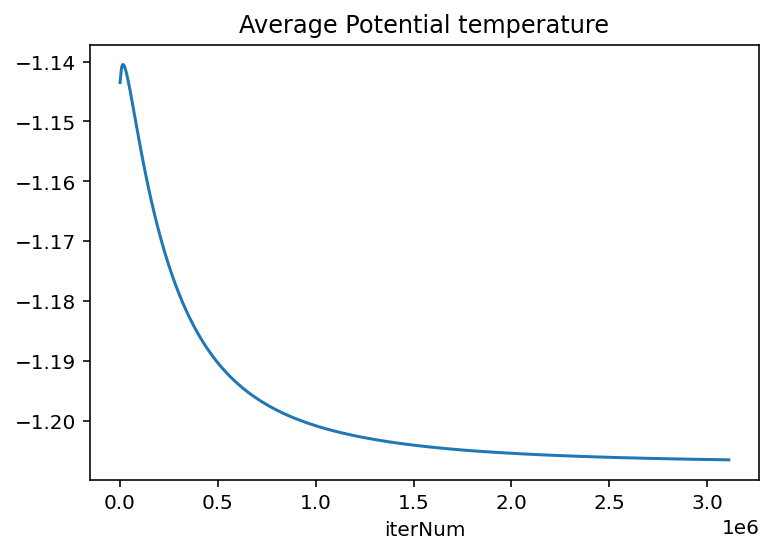

In [71]:
((ds_stats.THETA_avg * ds_stats.volume).sum(dim='RC') / ds_stats.volume.sum(dim='RC')).plot()
plt.title("Average Potential temperature")
plt.show()

## Kinetic Energy (top 15 layers)

In [74]:
ds["VolumeTracer"] = ds.drF * ds.rA * ds.hFacC

In [75]:
ke_norm = ke * ds.VolumeTracer / ds.VolumeTracer.sum(dim=["XC", "YC", "Z"])

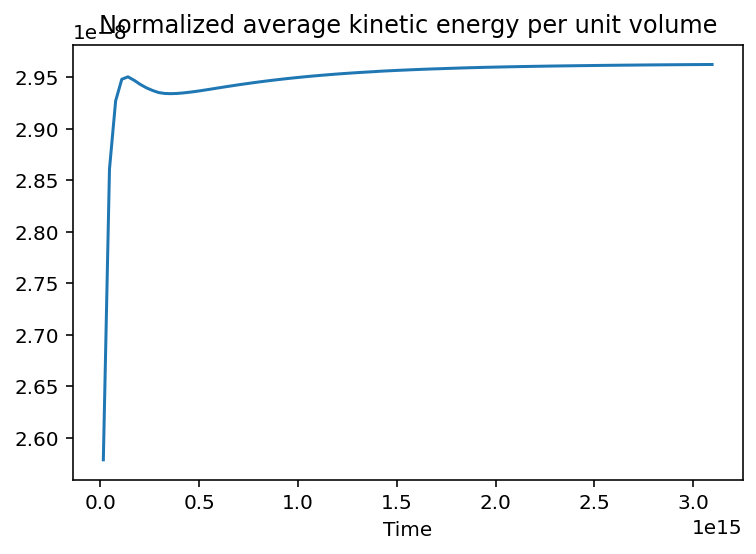

In [76]:
fig, ax = plt.subplots()
ke_norm.isel(Z=slice(0, 15)).mean(dim=["XC", "YC", "Z"]).plot(ax=ax)
ax.set_title("Normalized average kinetic energy per unit volume")
plt.show()

Kinetic energy and heat content close to equilibrium after 100 years.

# Misc

## Smagorisnky constant

In [77]:
UVEL_surf = ds.UVEL.isel(Z=0)
VVEL_surf = ds.VVEL.isel(Z=0)

In [78]:
dudx = grid.diff(UVEL_surf * ds.dyG, 'X') / ds.rA
dvdy = grid.diff(VVEL_surf * ds.dxG, 'Y') / ds.rA

In [79]:
dudy = grid.diff(UVEL_surf * ds.dxC, 'Y', boundary='fill') / ds.rAz
dvdx = grid.diff(VVEL_surf * ds.dyC, 'X') / ds.rAz

In [82]:
dudy_centered = grid.interp(grid.interp(dudy, "X"), "Y")
dvdx_centered = grid.interp(grid.interp(dvdx, "X"), "Y")

In [83]:
smagnoC = ds.rA * np.sqrt(dudx**2 + 0.5*(dudy_centered + dvdx_centered)**2 + dvdy**2)

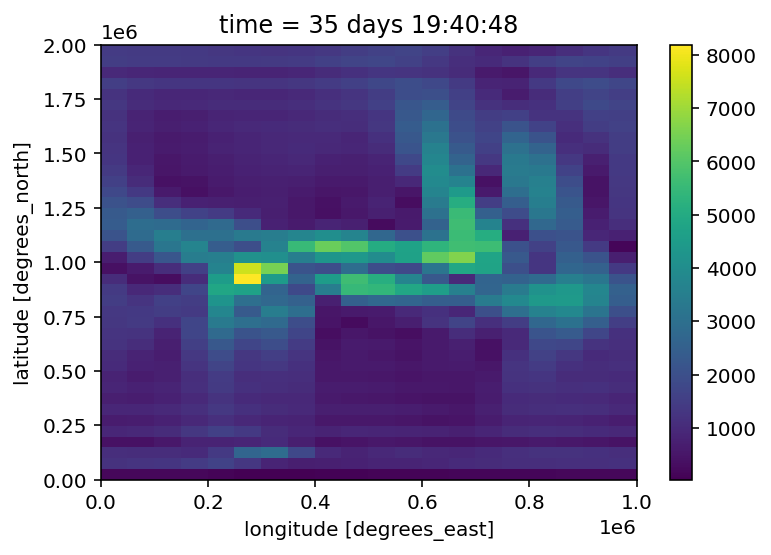

In [85]:
smagnoC.isel(time=-1).plot()

In [36]:
smagnoC.isel(time=-1).mean().compute()

<xarray.DataArray ()>
array(2224.0747, dtype=float32)
Coordinates:
    time     timedelta64[ns] 39 days 21:36:00

## Slopes

In [7]:
dTHETAdz = -grid.derivative(grid.interp(ds.THETA, axis='Z', to='outer'), axis='Z') # negative sign since xgcm uses drF, which is positive, but should be negative.

/nethome/4302001/miniconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/nethome/4302001/miniconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


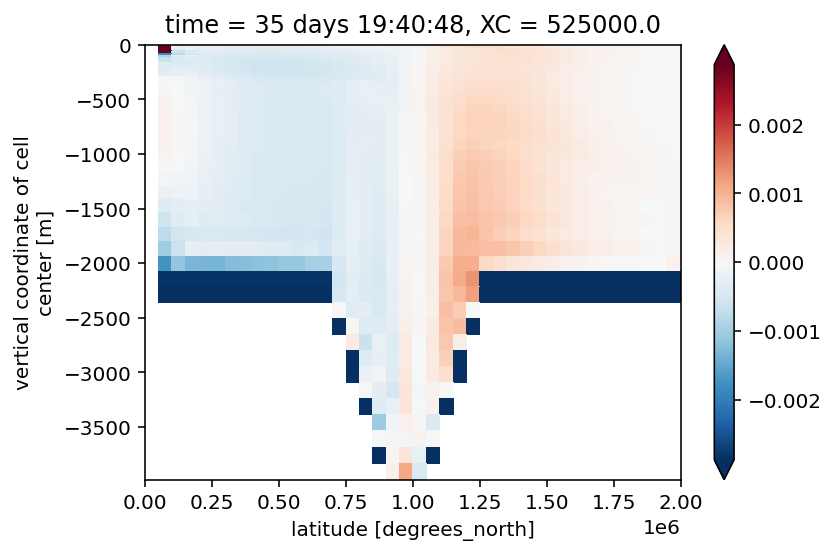

In [8]:
Sx = (-grid.interp(grid.derivative(ds.THETA, axis='X'), 'X', to='center')/dTHETAdz)
Sx.isel(time=-1, XC=10).plot(robust=True)

/nethome/4302001/miniconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/nethome/4302001/miniconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


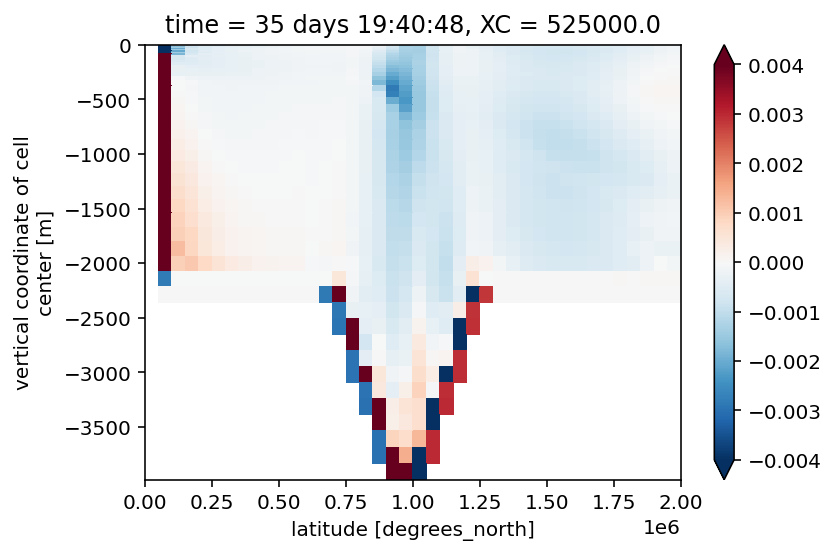

In [9]:
Sy = (-grid.interp(grid.derivative(ds.THETA, axis='Y'), 'Y', to='center')/dTHETAdz)
Sy.isel(time=-1, XC=10).plot(vmax=0.004)

/nethome/4302001/miniconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/nethome/4302001/miniconda3/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


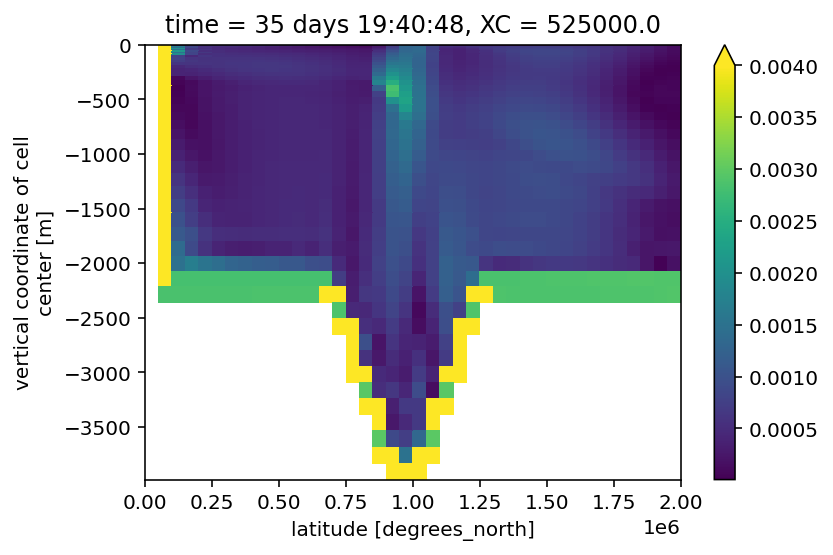

In [10]:
Sabs = np.sqrt(Sy**2 + Sx**2)
Sabs.isel(time=-1, XC=10).plot(vmax=0.004)